# Revisar isso aqui

Resultado ficou muito esquisito. Refazer a matemática

## Applying PINN to the PDE - 1D Version

We are interessed in solving

$$
\frac{\partial \rho}{\partial t} = \nabla \cdot \left(\Sigma \nabla\rho(x,t) - \rho(x,t) F(\rho(x,t)) \right)
$$



Where $x=x_1$. $\Sigma = \rm{diag} (\sigma_1^2, \sigma_2^2)$. $F: \mathbb{R} \mapsto \mathbb{R}$, $F(\rho) = f(\rho)$.

On the domain

$$
\Omega = \{x \in [0,L]\}
$$

With boundary conditions

$$
j \cdot n = -a (\rho_{max} - \rho) \quad \forall x \in \Gamma_{in}
$$

$$
j \cdot n = b \rho \quad \forall x \in \Gamma_{out}
$$


where

$$
\Gamma_{in} = \{(x_1, x_2) \in \Omega: x_1 = 0\}
$$

$$
\Gamma_{out} = \{(x_1, x_2) \in \Omega: x_1 = L\}
$$


With $j = -\Sigma \nabla \rho + \rho F(\rho)$, $j = -\sigma_1 \frac{\partial \rho}{\partial x_1} + \rho f(\rho)$ and $n$ the outer normal vector, i.e. vector points toward the interior:

$$
n = -1 \quad \rm{for} \quad \Gamma_{in}
$$

$$
n = 1\quad \rm{for} \quad \Gamma_{out}
$$


In a more explicit manner, the PDE can be written as

$$
\frac{\partial \rho}{\partial t} = \sigma_1 \frac{\partial^2 \rho}{\partial x_1^2} - \frac{\partial \rho}{\partial x_1} \left(f(\rho(x,t)) + \rho(x,t) \frac{d f(\rho(x,t))}{d \rho} \right)
$$

## Nondimensionalization

#### Identify the Variables and Parameters

- Dependent Variable: $\rho(x_1, t)$
- Independent Variable: $x_1, t$
- Parameters: $\sigma_1$
- Function: $f(\rho)$

#### Choose Characteristic Scales

- Lenght: $L$
- Time: $\tau$
- Density: $\rho_0$

#### Nondimensionalize the Variables

- Position: $\tilde{x}_1 = x_1/L$
- Time: $\tilde{t} = t/\tau$
- Density: $\tilde{\rho} = \rho/\rho_0$

### Express the partial derivatives in terms of dimensionless variables

- Time:

$$
\frac{\partial \rho}{\partial t} = \frac{\partial (\tilde{\rho} \rho_0)}{\partial (\tilde{t} \tau)} = \frac{\rho_0}{\tau} \frac{\partial \tilde{\rho}}{\partial \tilde{t}}
$$

- Spatial:

$$
\frac{\partial \rho}{\partial x_1} = \frac{\partial (\tilde{\rho} \rho_0)}{\partial (\tilde{x}_1 L)} = \frac{\rho_0}{L} \frac{\partial \tilde{\rho}}{\partial \tilde{x}_1}
$$

- Second Spatial:

$$
\frac{\partial^2 \rho}{\partial x_1^2} = \frac{\partial^2 (\tilde{\rho} \rho_0)}{\partial (\tilde{x}_1 L)^2} = \frac{\rho_0}{L^2} \frac{\partial^2 \tilde{\rho}}{\partial \tilde{x}_1^2}
$$

- Function:

$$
\frac{d f(\rho)}{d \rho} = \frac{d f(\tilde{\rho} \rho_0)}{d (\tilde{\rho} \rho_0)} \cdot \rho_0 = \rho_0 \frac{d f}{d (\tilde{\rho} \rho_0)}
$$

Substituting in the original equation:

$$
\frac{\rho_0}{\tau} \frac{\partial \tilde{\rho}}{\partial \tilde{t}} = \sigma_1 \frac{\rho_0}{L^2} \frac{\partial^2 \tilde{\rho}}{\partial \tilde{x}_1^2} - \frac{\rho_0}{L} \frac{\partial \tilde{\rho}}{\partial \tilde{x}_1} \left(f(\tilde{\rho} \rho_0) + \tilde{\rho} \rho_0 \cdot \rho_0 \frac{d f(\tilde{\rho} \rho_0)}{d (\tilde{\rho} \rho_0)} \right)
$$

Divide by $\rho_0$

$$
\frac{1}{\tau} \frac{\partial \tilde{\rho}}{\partial \tilde{t}} = \frac{\sigma_1}{L^2} \frac{\partial^2 \tilde{\rho}}{\partial \tilde{x}_1^2} - \frac{1}{L} \frac{\partial \tilde{\rho}}{\partial \tilde{x}_1} \left(f(\tilde{\rho} \rho_0) + \tilde{\rho} \rho_0 \cdot \rho_0 \frac{d f(\tilde{\rho} \rho_0)}{d (\tilde{\rho} \rho_0)} \right)
$$


Choose the charachteristic time scale to be:

$$
\tau = \frac{L^2}{\sigma_1}
$$

$$
\frac{\sigma_1}{L^2} \frac{\partial \tilde{\rho}}{\partial \tilde{t}} = \frac{\sigma_1}{L^2} \frac{\partial^2 \tilde{\rho}}{\partial \tilde{x}_1^2} - \frac{1}{L} \frac{\partial \tilde{\rho}}{\partial \tilde{x}_1} \left(f(\tilde{\rho} \rho_0) + \tilde{\rho} \rho_0 \cdot \rho_0 \frac{d f(\tilde{\rho} \rho_0)}{d (\tilde{\rho} \rho_0)} \right)
$$


Divide through by $\frac{\sigma_1}{L^2}:

$$
\frac{\partial \tilde{\rho}}{\partial \tilde{t}} = \frac{\partial^2 \tilde{\rho}}{\partial \tilde{x}_1^2} - \frac{L}{\sigma_1} \frac{\partial \tilde{\rho}}{\partial \tilde{x}_1} \left(f(\tilde{\rho} \rho_0) + \tilde{\rho} \rho_0 \cdot \rho_0 \frac{d f(\tilde{\rho} \rho_0)}{d (\tilde{\rho} \rho_0)} \right)
$$


Finally:

$$
\frac{\partial \tilde{\rho}}{\partial \tilde{t}} = \frac{\partial^2 \tilde{\rho}}{\partial \tilde{x}_1^2} - \frac{L}{\sigma_1} \frac{\partial \tilde{\rho}}{\partial \tilde{x}_1} \left(f(\tilde{\rho} \rho_0) + \tilde{\rho} \rho_0^2 \frac{d f(\tilde{\rho} \rho_0)}{d (\tilde{\rho} \rho_0)} \right)
$$

For $j$, it becomes (confirmar):

$$
\tilde{j} = - \frac{\partial \tilde{\rho}}{\partial \tilde{x}_1} + \frac{L}{\sigma_1} \tilde{\rho} f(\tilde{\rho} \rho_0)
$$

It will not be needed, but:

$$
j_0 = \frac{\sigma_1 \rho_0}{L}
$$

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import equinox as eqx

import optax

import timeit

from scipy.stats import qmc

In [27]:
# Correct that to import from the other file

from abc import ABC, abstractmethod

class FundamentalDiagram():
    def __init__(self, params):
        self.params = params

    def __call__(self,density):
        return self.flux(density)
    
    @abstractmethod
    def flux(self, density):
        pass

    @abstractmethod
    def __str__(self):
        pass



class Greenshield(FundamentalDiagram):
    def __init__(self, params):
        super().__init__(params)
        self.v_max = self.params[0]
        self.p_max = self.params[1]
    
    def flux(self, density):
        return self.v_max * (1 - (density/self.p_max))
    
    def d_flux(self, density):
        return - self.v_max/self.p_max + 0*density
    
    def __str__(self):
        return "Greenshield"

In [28]:
sigma1 = 0.5*0.5
sigma2 = 0.5*0.5

L = 2
T = 30

a = 0.9
b = 0.975


v_max = 1.2
p_max = 1 # rho_max cannot be learned Susana's paper


# Characteristic Variables:

char_L = L
char_t = (char_L**2)/sigma1
rho0 = p_max

In [29]:
func = Greenshield([v_max, p_max])

In [186]:
def pde_loss(model, func, input, sigma1, char_L, rho0):
    
    # p = rho

    rho, grad = jax.vmap(jax.value_and_grad(model))(input)
    hess = jax.vmap(jax.hessian(model))(input)

    dp_dx1 = grad[:, 0] 
    dp_dt = grad[:, 1]
    d2p_dx12 = hess[:, 0, 0]


    fp = func.flux(rho * rho0)
    df_p = func.d_flux(rho * rho0)

    rhs = d2p_dx12 - (char_L / sigma1) * dp_dx1 * (fp + rho * rho0 * df_p)

    return jnp.mean((dp_dt - rhs)**2)

In [187]:
def j(model, func, input, sigma1, char_L, rho0):
    rho, grad = jax.vmap(jax.value_and_grad(model))(input)

    i_0 = - grad[:, 0] + (char_L/sigma1) * rho * func(rho*rho0)

    return i_0, rho

In [205]:
def in_loss(model, func, T, sigma1, a, char_t, steps=20):

    t = jnp.linspace(0, T/char_t, steps)

    x1_flat = jnp.zeros_like(t)

    result = jnp.stack((x1_flat, t), axis=-1)

    in_ , rho = j(model, func, result, sigma1, char_L, rho0)

    in_theorical = a * (func.p_max - rho)


    return jnp.mean((-in_ - in_theorical)**2)


In [206]:
def out_loss(model, func, T, sigma1, b, char_L, steps=20):

    t = jnp.linspace(0, T, steps)

    x1_flat = jnp.full_like(t, L)/char_L

    result = jnp.stack((x1_flat, t), axis=-1)

    out_ , rho = j(model, func, result, sigma1, char_L, rho0)

    out_theorical = b * rho

    return jnp.mean((out_ - out_theorical)**2)

In [207]:
def time_loss(model, L, char_L, steps=20):

    x1 = jnp.linspace(0, L, steps)/char_L

    t_flat = jnp.zeros_like(x1)

    result = jnp.stack((x1, t_flat), axis=-1)

    rho = jax.vmap(model)(result)

    return jnp.mean(rho**2)

In [208]:
def loss(model, func, input, L, T, sigma1, char_L, rho0, a, b, steps=20):

    return (pde_loss(model, func, input, sigma1, char_L, rho0) + in_loss(model, func, T, sigma1, a, char_t, steps) + 
            out_loss(model, func, T, sigma1, b, char_L, steps) + 
            0.1*time_loss(model, L, char_L, steps))

In [209]:
def generate_latin_hypercube_samples(num_samples, x1, t):
    # Define the ranges
    parameter_ranges = jnp.array([x1, t])
    
    # Create a Latin Hypercube Sampler
    sampler = qmc.LatinHypercube(d=len(parameter_ranges))
    
    # Sample points in the hypercube
    sample_points = sampler.random(n=num_samples)
    
    # Scale the points
    scaled_samples = qmc.scale(sample_points, parameter_ranges[:, 0], parameter_ranges[:, 1])
    
    return jnp.array(scaled_samples)

In [210]:
# Define a Multilayer Perceptron

class MLP(eqx.Module):
    layers: list  # Type annotation indicating that layers is a list. Needed to work properly.


    def __init__(self, key, input_dim, hidden_dims, n_layers, output_dim):
        """Define the MLP

        Args:
            key (jax key): Random Jey
            input_dim (int): Input layer dimension
            hidden_dims (int): Hidden layers dimension
            n_layers (_type_): Number of hidden layers
            output_dim (_type_): Output layer dimension
        """


        
        # jax handle random number generation in a different way. Favoring reproducibility.
        # This gives each layer a rnd initialization.
        keys = jax.random.split(key, n_layers + 1)
        
        dims = [input_dim] + [hidden_dims] * n_layers + [output_dim]
        self.layers = [eqx.nn.Linear(dims[i], dims[i + 1], key=keys[i]) for i in range(len(dims) - 1)]

    
    def __call__(self, x):
        """Forward-pass the input through the network

        Args:
            x (jnp.array): Input

        Returns:
            jnp.array: NN output
        """
        for layer in self.layers[:-1]:
            x = jax.nn.swish(layer(x))
            # So far, softplus seems to be the best
            # squareplus is curious
            # celu shallow (1 layer) got the steady state thing and the curious curve on the x,y plane at steady state.
            # swish got somewhat excelent results, but the PDE loss is high
        x = self.layers[-1](x)
        return x

In [232]:
# Initialize the model with multiple hidden layers and scalar output layer
model_key = jax.random.PRNGKey(1)


output_dim = 'scalar'

model = MLP(model_key, input_dim=2, hidden_dims=256, n_layers=4, output_dim=output_dim)

In [233]:
# Optimizer definition
lr = 0.00001
optimizer = optax.adam(learning_rate=lr)
opt_state = optimizer.init(model)

In [234]:
@eqx.filter_jit # decorator that applies Just-in-time compilation just to the relevant parts. Improves performance.
def train_step(model, opt_state, func, input, L, T, sigma1, char_L, rho0, a, b, steps=20):
    loss_value, grads = jax.value_and_grad(loss)(model, func, input, L, T, sigma1, char_L, rho0, a, b, steps) # Compute the loss and gradient
    updates, opt_state = optimizer.update(grads, opt_state) # Apply the backward propagation
    model = eqx.apply_updates(model, updates) # Update the NN
    return model, opt_state, loss_value

In [235]:
# Training loop
num_epochs = 10000
losses = []



sample_n = 50
x = generate_latin_hypercube_samples(sample_n, [0,L/char_L], [0,T/char_t]) # Latin Hypercube sample

sample_points = x.copy()

for epoch in range(num_epochs):
    
    model, opt_state, loss_value = train_step(model, opt_state, func, x, L, T, sigma1, char_L, rho0, a, b, steps=20)
    if epoch % 100 == 0:
        x = generate_latin_hypercube_samples(sample_n, [0,L/char_L], [0,T/char_t]) # Latin Hypercube sample
        sample_points = jnp.vstack((sample_points, x))
        losses.append(loss_value)
        print(f"Epoch {epoch}, Loss: {loss_value}")


    if epoch % 1000 == 0:
        lr *= 0.25
        optimizer = optax.adam(learning_rate=lr)
        opt_state = optimizer.init(model)  # Re-initialize optimizer state with new learning rate

        

# Print final loss
x = generate_latin_hypercube_samples(sample_n, [0,L/char_L], [0,T/char_t]) # Latin Hypercube sample
final_loss = loss(model, func, x, L, T, sigma1, char_L, rho0, a, b, steps=20)
print(f"Final Loss: {final_loss}")

Epoch 0, Loss: 1.0676562786102295
Epoch 100, Loss: 0.1613941192626953
Epoch 200, Loss: 0.09611967951059341
Epoch 300, Loss: 0.08457031100988388
Epoch 400, Loss: 0.08170841634273529
Epoch 500, Loss: 0.07993172854185104
Epoch 600, Loss: 0.0782400518655777
Epoch 700, Loss: 0.076402448117733
Epoch 800, Loss: 0.07475407421588898
Epoch 900, Loss: 0.07324526458978653
Epoch 1000, Loss: 0.071650430560112
Epoch 1100, Loss: 0.06834180653095245
Epoch 1200, Loss: 0.06507942080497742
Epoch 1300, Loss: 0.06264682114124298
Epoch 1400, Loss: 0.060345686972141266
Epoch 1500, Loss: 0.05879936367273331
Epoch 1600, Loss: 0.05698491260409355
Epoch 1700, Loss: 0.05576486140489578
Epoch 1800, Loss: 0.054603300988674164
Epoch 1900, Loss: 0.05388229340314865
Epoch 2000, Loss: 0.05254873260855675
Epoch 2100, Loss: 0.052617885172367096
Epoch 2200, Loss: 0.0521288737654686
Epoch 2300, Loss: 0.05138256400823593
Epoch 2400, Loss: 0.05153139308094978
Epoch 2500, Loss: 0.051209017634391785
Epoch 2600, Loss: 0.05041234

KeyboardInterrupt: 

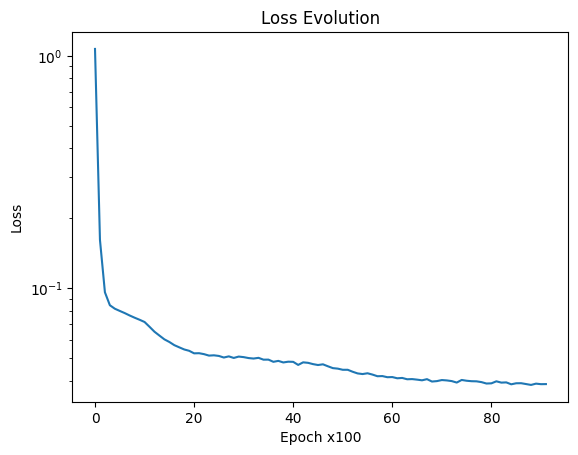

In [236]:
plt.plot(losses)
plt.yscale('log')
plt.xlabel('Epoch x100')
plt.ylabel('Loss')
plt.title('Loss Evolution')
plt.show()

In [237]:
print(pde_loss(model, func, x,  sigma1, char_L, rho0))
print(in_loss(model, func, T, sigma1, a, char_L))
print(out_loss(model, func, T, sigma1,  b, char_L))
print(time_loss(model, L, char_L))

0.0049102074
0.072968245
0.028358413
0.0022463824


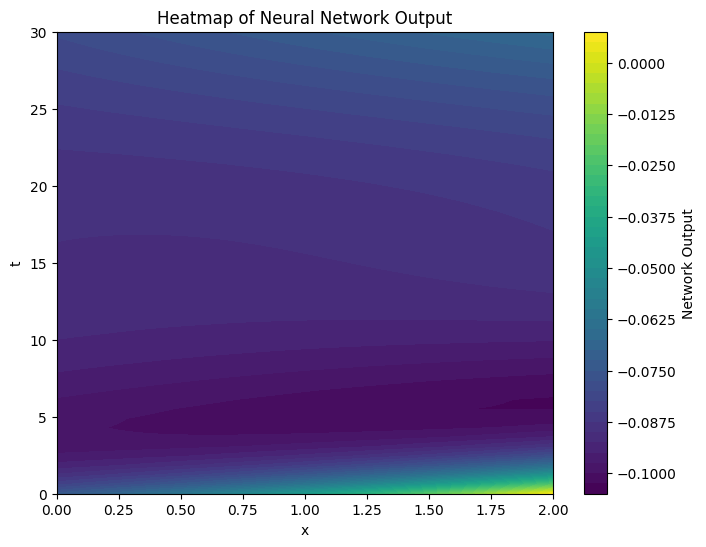

In [238]:
n_points = 50
x = jnp.linspace(0, L/char_L, n_points)
t = jnp.linspace(0, T/char_t, n_points)
X_grid, T_grid = jnp.meshgrid(x, t)
inputs = jnp.stack((X_grid.flatten(), T_grid.flatten()), axis=-1)

outputs = jax.vmap(model)(inputs)*rho0
outputs = outputs.reshape(n_points, n_points)

plt.figure(figsize=(8, 6))
plt.contourf(X_grid*char_L, T_grid*char_t, outputs, levels=50, cmap='viridis')
plt.colorbar(label='Network Output')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Heatmap of Neural Network Output')
plt.show()

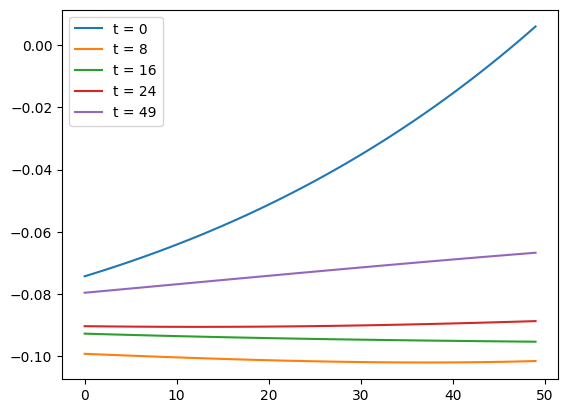

In [239]:
from cProfile import label


plt.plot(outputs[0], label='t = 0')
plt.plot(outputs[8], label='t = 8')
plt.plot(outputs[16], label='t = 16')
plt.plot(outputs[24], label='t = 24')
plt.plot(outputs[49], label='t = 49')
#plt.ylim([0.3, 0.7])
plt.legend()
plt.show()

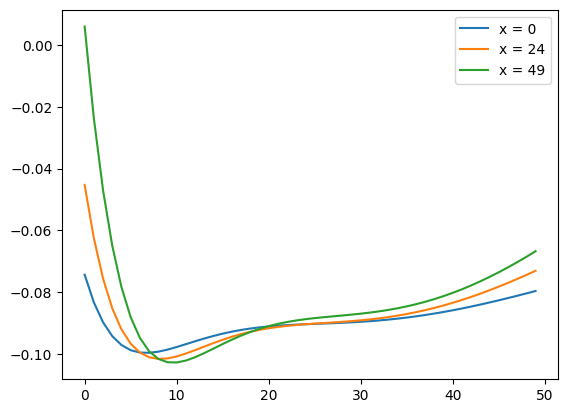

In [240]:
from cProfile import label


plt.plot(outputs.T[0], label='x = 0')
plt.plot(outputs.T[24], label='x = 24')
plt.plot(outputs.T[49], label='x = 49')
plt.legend()
plt.show()